In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Importing dataset**

In [ ]:
import pandas as pd
train_data_true = pd.read_csv('/content/drive/My Drive/Team 2 BI/20191101-20200326-covid19.csv', names = ['Date', 'URL', 'Title', 'Body'])
train_data_false = pd.read_csv('/content/drive/My Drive/Team 2 BI/20191101-20200326-falsehoods.csv', names = ['Date', 'URL', 'Title', 'Body'])

In [ ]:
train_data_true

,Date,URL,Title,Body
0,2020-03-17 17:04:30 UTC,https://democratherald.com/news/national/the-l...,The Latest: Trump: US builders should hand ove...,"With a population of 46 million, Spain became ..."
1,2020-03-15 10:32:24 UTC,https://www.ballinaadvocate.com.au/news/mum-op...,Mum opts to keep kids home to stop spread of C...,"The spokeswoman said until then, they were wor..."
2,2020-03-25 05:16:51 UTC,https://www.9and10news.com/i/the-latest-south-...,The Latest: South Korea to quarantine some arr...,"Wuhan will remain locked down until April 8, w..."
3,2020-03-18 09:49:56 UTC,https://www.nytimes.com/2020/03/18/world/asia/...,China Defends Expulsion of American Journalist...,"Under Mr. Xi, the news media has come under an..."
4,2020-03-19 02:18:24 UTC,https://www.pakistantelegraph.com/news/2643497...,Why New Zealand needs to continue decisive act...,With some of the toughest border restrictions ...
...,...,...,...,...
2848378,2020-03-24 20:18:40 UTC,https://www.wjr.com/news/olive-garden-chilis-a...,"Olive Garden, Chili's and other restaurant cha...",Restaurants are taking an astounding hit becau...
2848379,2020-03-24 22:32:22 UTC,https://www.wdel.com/news/carney-moves-delawar...,"Carney moves Delaware's primary, bans foreclos...",On the day Delaware crossed 100 lab-confirmed ...
2848380,2020-03-15 19:02:26 UTC,https://www.thehindu.com/entertainment/movies/...,"'Master' audio launch: Vijay says, ""Kill them ...",The actor instead focused on discussing the fi...
2848381,2020-03-18 23:02:22 UTC,https://www.dailymercury.com.au/news/could-gho...,Could ghost crowds cure footy's age-old yips?,"You start forgetting your routine, it eats int..."


In [ ]:
train_data_false

,Date,URL,Title,Body
0,2020-02-07 17:03:45 UTC,https://www.bbc.com/news/world-europe-51413870,Coronavirus: Russian media hint at US conspiracy,"The report also rehashes old, false claims by ..."
1,2020-03-05 10:48:15 UTC,https://www.middleeasteye.net/news/coronavirus...,"Conspiracies, remedies, remixes: Five ways the...",She said the Gulf emirate spread coronavirus t...
2,2020-03-19 22:17:40 UTC,https://www.standardmedia.co.ke/article/200136...,Why naming COVID-19 patients will help State f...,"Therefore, when one relates to the experiences..."
3,2020-02-17 06:48:00 UTC,https://www.rediff.com/news/report/china-virus...,"China virus toll rises to 1,770; cases up to 7...",Ghebreyesus also met Chinese Foreign Minister ...
4,2020-03-26 01:16:45 UTC,https://www.nbcnews.com/news/asian-america/hou...,House members introduce resolution to pin coro...,"In California, an Asian teen was sent to the e..."
...,...,...,...,...
60167,2020-03-21 19:48:12 UTC,https://wmeq.iheart.com/content/2020-03-21-75-...,75 Million Told to Stay Home As Coronavirus Ca...,Here is your daily coronavirus updates for Sat...
60168,2020-03-20 17:20:10 UTC,https://www.kearneyhub.com/news/trending/mike-...,Mike Bloomberg to give $18M to DNC; state part...,Since then he has given tens of millions of hi...
60169,2020-03-24 19:18:07 UTC,https://www.bignewsnetwork.com/news/264410490/...,Coronavirus and sex: Dos and don'ts during soc...,"Lately, the one topic the entire world is con..."
60170,2020-03-21 02:02:19 UTC,https://kdge.iheart.com/content/2020-03-20-bac...,'Bachelor' Star Colton Underwood Reveals He Te...,"I'll keep you posted, Love y'all."" In the vide..."


In [ ]:
train_data_false['Label'] = 1
train_data_false

,Date,URL,Title,Body,Label
0,2020-02-07 17:03:45 UTC,https://www.bbc.com/news/world-europe-51413870,Coronavirus: Russian media hint at US conspiracy,"The report also rehashes old, false claims by ...",1
1,2020-03-05 10:48:15 UTC,https://www.middleeasteye.net/news/coronavirus...,"Conspiracies, remedies, remixes: Five ways the...",She said the Gulf emirate spread coronavirus t...,1
2,2020-03-19 22:17:40 UTC,https://www.standardmedia.co.ke/article/200136...,Why naming COVID-19 patients will help State f...,"Therefore, when one relates to the experiences...",1
3,2020-02-17 06:48:00 UTC,https://www.rediff.com/news/report/china-virus...,"China virus toll rises to 1,770; cases up to 7...",Ghebreyesus also met Chinese Foreign Minister ...,1
4,2020-03-26 01:16:45 UTC,https://www.nbcnews.com/news/asian-america/hou...,House members introduce resolution to pin coro...,"In California, an Asian teen was sent to the e...",1
...,...,...,...,...,...
60167,2020-03-21 19:48:12 UTC,https://wmeq.iheart.com/content/2020-03-21-75-...,75 Million Told to Stay Home As Coronavirus Ca...,Here is your daily coronavirus updates for Sat...,1
60168,2020-03-20 17:20:10 UTC,https://www.kearneyhub.com/news/trending/mike-...,Mike Bloomberg to give $18M to DNC; state part...,Since then he has given tens of millions of hi...,1
60169,2020-03-24 19:18:07 UTC,https://www.bignewsnetwork.com/news/264410490/...,Coronavirus and sex: Dos and don'ts during soc...,"Lately, the one topic the entire world is con...",1
60170,2020-03-21 02:02:19 UTC,https://kdge.iheart.com/content/2020-03-20-bac...,'Bachelor' Star Colton Underwood Reveals He Te...,"I'll keep you posted, Love y'all."" In the vide...",1


In [ ]:
train_data_true['Label'] = 0
train_data_true

,Date,URL,Title,Body,Label
0,2020-03-17 17:04:30 UTC,https://democratherald.com/news/national/the-l...,The Latest: Trump: US builders should hand ove...,"With a population of 46 million, Spain became ...",0
1,2020-03-15 10:32:24 UTC,https://www.ballinaadvocate.com.au/news/mum-op...,Mum opts to keep kids home to stop spread of C...,"The spokeswoman said until then, they were wor...",0
2,2020-03-25 05:16:51 UTC,https://www.9and10news.com/i/the-latest-south-...,The Latest: South Korea to quarantine some arr...,"Wuhan will remain locked down until April 8, w...",0
3,2020-03-18 09:49:56 UTC,https://www.nytimes.com/2020/03/18/world/asia/...,China Defends Expulsion of American Journalist...,"Under Mr. Xi, the news media has come under an...",0
4,2020-03-19 02:18:24 UTC,https://www.pakistantelegraph.com/news/2643497...,Why New Zealand needs to continue decisive act...,With some of the toughest border restrictions ...,0
...,...,...,...,...,...
2848378,2020-03-24 20:18:40 UTC,https://www.wjr.com/news/olive-garden-chilis-a...,"Olive Garden, Chili's and other restaurant cha...",Restaurants are taking an astounding hit becau...,0
2848379,2020-03-24 22:32:22 UTC,https://www.wdel.com/news/carney-moves-delawar...,"Carney moves Delaware's primary, bans foreclos...",On the day Delaware crossed 100 lab-confirmed ...,0
2848380,2020-03-15 19:02:26 UTC,https://www.thehindu.com/entertainment/movies/...,"'Master' audio launch: Vijay says, ""Kill them ...",The actor instead focused on discussing the fi...,0
2848381,2020-03-18 23:02:22 UTC,https://www.dailymercury.com.au/news/could-gho...,Could ghost crowds cure footy's age-old yips?,"You start forgetting your routine, it eats int...",0


### **Merging and Shuffling**

In [ ]:
from sklearn.utils import shuffle

train_data_true = train_data_true.drop_duplicates(keep = False)
train_data_false = train_data_false.drop_duplicates(keep = False)

covid19_data = pd.concat([train_data_false.head(30000), train_data_true.head(20000)])

covid19_data = covid19_data[['Date','URL', 'Title', 'Body', 'Label']]
covid19_data.head(20)

,Date,URL,Title,Body,Label
0,2020-02-07 17:03:45 UTC,https://www.bbc.com/news/world-europe-51413870,Coronavirus: Russian media hint at US conspiracy,"The report also rehashes old, false claims by ...",1
1,2020-03-05 10:48:15 UTC,https://www.middleeasteye.net/news/coronavirus...,"Conspiracies, remedies, remixes: Five ways the...",She said the Gulf emirate spread coronavirus t...,1
2,2020-03-19 22:17:40 UTC,https://www.standardmedia.co.ke/article/200136...,Why naming COVID-19 patients will help State f...,"Therefore, when one relates to the experiences...",1
3,2020-02-17 06:48:00 UTC,https://www.rediff.com/news/report/china-virus...,"China virus toll rises to 1,770; cases up to 7...",Ghebreyesus also met Chinese Foreign Minister ...,1
4,2020-03-26 01:16:45 UTC,https://www.nbcnews.com/news/asian-america/hou...,House members introduce resolution to pin coro...,"In California, an Asian teen was sent to the e...",1
5,2020-01-24 23:33:34 UTC,https://www.reflector.com/news/national/not-re...,NOT REAL NEWS: A look at what didn't happen th...,The patent being shared online covers the deve...,1
6,2020-02-27 00:01:32 UTC,https://www.msn.com/en-in/news/world/italy-ear...,Italy earmarks 650 million euros to help coron...,Di Maio wrote on Facebook. A further 350 milli...,1
7,2020-02-03 10:17:32 UTC,https://www.thejakartapost.com/news/2020/02/03...,Indonesia wages war against coronavirus misinf...,The ministry had taken steps to fight against ...,1
8,2020-02-22 01:32:17 UTC,https://www.news-daily.com/news/world_nation/a...,A group of college students may face disciplin...,But the death toll is not the only tragic cons...,1
9,2020-02-06 18:03:30 UTC,https://fox61.com/2020/02/06/chinese-doctor-wh...,Chinese doctor who sounded the alarm on corona...,"Li Wenliang, a 34-year-old doctor working in W...",1


In [ ]:
covid19_data.isnull().sum()

Date      0
URL       0
Title    32
Body      0
Label     0
dtype: int64

In [ ]:
covid19_data['Title'] = covid19_data['Title'].fillna(value = 'Missing')
covid19_data = covid19_data.dropna()
covid19_data.isnull().sum()

Date     0
URL      0
Title    0
Body     0
Label    0
dtype: int64

In [ ]:
length = []
[length.append(len(str(text))) for text in covid19_data['Body']]
covid19_data['length'] = length
covid19_data.head()

,Date,URL,Title,Body,Label,length
0,2020-02-07 17:03:45 UTC,https://www.bbc.com/news/world-europe-51413870,Coronavirus: Russian media hint at US conspiracy,"The report also rehashes old, false claims by ...",1,508
1,2020-03-05 10:48:15 UTC,https://www.middleeasteye.net/news/coronavirus...,"Conspiracies, remedies, remixes: Five ways the...",She said the Gulf emirate spread coronavirus t...,1,800
2,2020-03-19 22:17:40 UTC,https://www.standardmedia.co.ke/article/200136...,Why naming COVID-19 patients will help State f...,"Therefore, when one relates to the experiences...",1,606
3,2020-02-17 06:48:00 UTC,https://www.rediff.com/news/report/china-virus...,"China virus toll rises to 1,770; cases up to 7...",Ghebreyesus also met Chinese Foreign Minister ...,1,598
4,2020-03-26 01:16:45 UTC,https://www.nbcnews.com/news/asian-america/hou...,House members introduce resolution to pin coro...,"In California, an Asian teen was sent to the e...",1,638


### **Removing Outliers**

In [ ]:
len(covid19_data[covid19_data['length'] < 50])

3

In [ ]:
covid19_data = covid19_data.drop(covid19_data['Body'][covid19_data['length'] < 50].index, axis = 0)

In [ ]:
covid19_data = covid19_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
covid19_data['Title'] = covid19_data['Title'].str.replace('[^\w\s]','')
covid19_data['Title'] = covid19_data['Title'].str.replace('<.*?>','')
covid19_data['Body'] = covid19_data['Body'].str.replace('[^\w\s]','')
covid19_data['Body'] = covid19_data['Body'].str.replace('<.*?>','')

### **Tokenization**

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [ ]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in covid19_data['Body']]
covid19_data['tokens_text'] = tokens


In [ ]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in covid19_data['Title']]
covid19_data['tokens_title'] = tokens

In [ ]:
covid19_data[['tokens_title' , 'tokens_text']]

,tokens_title,tokens_text
0,"[coronavirus, russian, media, hint, at, us, co...","[the, report, also, rehashes, old, false, clai..."
1,"[conspiracies, remedies, remixes, five, ways, ...","[she, said, the, gulf, emirate, spread, corona..."
2,"[why, naming, covid19, patients, will, help, s...","[therefore, when, one, relates, to, the, exper..."
3,"[china, virus, toll, rises, to, 1770, cases, u...","[ghebreyesus, also, met, chinese, foreign, min..."
4,"[house, members, introduce, resolution, to, pi...","[in, california, an, asian, teen, was, sent, t..."
...,...,...
19995,"[fda, warns, of, fraudulent, coronavirus, diag...","[washington, dc, fda, the, us, food, and, drug..."
19996,"[5, things, to, know, for, february, 17, coron...","[sign, up, here, 1, coronavirus, as, the, coro..."
19997,"[us, defense, chief, slams, china, as, rising,...","[munich, germany, ap, us, defense, secretary, ..."
19998,"[public, health, agency, weighs, stronger, cov...","[the, nurses, unions, warned, the, national, g..."


### **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
  my_list = row['tokens_text']
  stemmed_list = [stemming.stem(word) for word in my_list]
  return stemmed_list

covid19_data['stemmed_words_text'] = covid19_data.apply(stem_list, axis = 1)

In [ ]:
def stem_list(row):
  my_list = row['tokens_title']
  stemmed_list = [stemming.stem(word) for word in my_list]
  return stemmed_list


covid19_data['stemmed_words_title'] = covid19_data.apply(stem_list, axis = 1)

### **Removing Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['stemmed_words_text']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

covid19_data['Body'] = covid19_data.apply(remove_stops, axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['stemmed_words_title']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

covid19_data['Title'] = covid19_data.apply(remove_stops, axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def rejoin_words(row):
  my_list = row['Body']
  joined_words = ( " ".join(my_list))
  return joined_words

covid19_data['Body'] = covid19_data.apply(rejoin_words, axis = 1)


In [ ]:
def rejoin_words(row):
  my_list = row['Title']
  joined_words = ( " ".join(my_list))
  return joined_words

covid19_data['Title'] = covid19_data.apply(rejoin_words, axis = 1)

In [ ]:
covid19_data.head()

,Date,URL,Title,Body,Label,length,tokens_text,tokens_title,stemmed_words_text,stemmed_words_title
0,2020-02-07 17:03:45 utc,https://www.bbc.com/news/world-europe-51413870,coronaviru russian media hint us conspiraci,report also rehash old fals claim kremlin medi...,1,508,"[the, report, also, rehashes, old, false, clai...","[coronavirus, russian, media, hint, at, us, co...","[the, report, also, rehash, old, fals, claim, ...","[coronaviru, russian, media, hint, at, us, con..."
1,2020-03-05 10:48:15 utc,https://www.middleeasteye.net/news/coronavirus...,conspiraci remedi remix five way middl east re...,said gulf emir spread coronaviru harm uae upco...,1,800,"[she, said, the, gulf, emirate, spread, corona...","[conspiracies, remedies, remixes, five, ways, ...","[she, said, the, gulf, emir, spread, coronavir...","[conspiraci, remedi, remix, five, way, the, mi..."
2,2020-03-19 22:17:40 utc,https://www.standardmedia.co.ke/article/200136...,whi name covid19 patient help state fight bug ...,therefor one relat experi victim get sens conf...,1,606,"[therefore, when, one, relates, to, the, exper...","[why, naming, covid19, patients, will, help, s...","[therefor, when, one, relat, to, the, experi, ...","[whi, name, covid19, patient, will, help, stat..."
3,2020-02-17 06:48:00 utc,https://www.rediff.com/news/report/china-virus...,china viru toll rise 1770 case 70500,ghebreyesu also met chines foreign minist wang...,1,598,"[ghebreyesus, also, met, chinese, foreign, min...","[china, virus, toll, rises, to, 1770, cases, u...","[ghebreyesu, also, met, chines, foreign, minis...","[china, viru, toll, rise, to, 1770, case, up, ..."
4,2020-03-26 01:16:45 utc,https://www.nbcnews.com/news/asian-america/hou...,hous member introduc resolut pin coronaviru bl...,california asian teen wa sent emerg room wa bu...,1,638,"[in, california, an, asian, teen, was, sent, t...","[house, members, introduce, resolution, to, pi...","[in, california, an, asian, teen, wa, sent, to...","[hous, member, introduc, resolut, to, pin, cor..."


### **Padding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = covid19_data['Body'])
X = tokenizer.texts_to_sequences(texts = covid19_data['Body'])

In [ ]:
word_index = tokenizer.word_index

In [ ]:
X = pad_sequences(sequences = X, maxlen = 1000, padding = 'pre')

In [ ]:
from keras.utils.np_utils import to_categorical
import numpy as np

print(X.shape)
y = to_categorical(np.asarray(covid19_data['Label'].values), num_classes = 2)
print(y.shape)

(49994, 1000)
(49994, 2)


### **Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split( X, y, test_size=0.50, random_state=42)

### **Glove model**

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

MAX_SEQUENCE_LENGTH = 1000
GLOVE_DIR = '/content/drive/My Drive/glove.6B.100d.txt' 
EMBEDDING_DIM = 100
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR), encoding="utf8")
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Total 400000 word vectors in Glove.


### **DeepCNN**

In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from keras.models import Model

convs = []
filter_sizes = [3,4,5]

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=64,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(pool_size = 2)(l_conv)
    convs.append(l_pool)
  

l_conv1 = Conv1D(filters=64, kernel_size=5, activation='relu')(l_pool)
l_pool1 = MaxPooling1D(pool_size = 2)(l_conv1)

l_conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(l_pool1)

l_drop1 = Dropout(0.2)(l_conv2) 

l_pool2 = MaxPooling1D(pool_size = 2)(l_conv2)


l_flat = Flatten()(l_pool2)
l_dense1 = Dense(1024, activation='relu')(l_flat)
l_dense2 = Dense(512, activation ='relu')(l_dense1)
l_dense3 = Dense(256, activation ='relu')(l_dense2)
l_dense4 = Dense(128, activation = 'relu')(l_dense3)
l_dense5 = Dense(62, activation = 'relu')(l_dense4)
l_dense6 = Dense(32, activation = 'relu')(l_dense5)
preds = Dense(2, activation='softmax')(l_dense6)

model_deepcnn = Model(sequence_input, preds)
model_deepcnn.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

model_deepcnn.summary()
history_deepcnn = model_deepcnn.fit(X_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=3)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=4)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=5)`
  if sys.path[0] == '':


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         6049300   
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 996, 64)           32064     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 498, 64)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 494, 64)           20544     
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 247, 64)           0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 243, 64)           2054

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 39995 samples, validate on 24997 samples
Epoch 1/10
39995/39995 [==============================] - 429s 11ms/step - loss: 0.2013 - accuracy: 0.9015 - val_loss: 0.0570 - val_accuracy: 0.9851
Epoch 2/10
39995/39995 [==============================] - 428s 11ms/step - loss: 0.0438 - accuracy: 0.9894 - val_loss: 0.0550 - val_accuracy: 0.9851
Epoch 3/10
39995/39995 [==============================] - 428s 11ms/step - loss: 0.0289 - accuracy: 0.9937 - val_loss: 0.0564 - val_accuracy: 0.9878
Epoch 4/10
39995/39995 [==============================] - 428s 11ms/step - loss: 0.0232 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9862
Epoch 5/10
39995/39995 [==============================] - 430s 11ms/step - loss: 0.0201 - accuracy: 0.9961 - val_loss: 0.0597 - val_accuracy: 0.9884
Epoch 6/10
39995/39995 [==============================] - 429s 11ms/step - loss: 0.0157 - accuracy: 0.9970 - val_loss: 0.0537 - val_accuracy: 0.9886
Epoch 7/10
39995/39995 [==============================] 

In [ ]:
test_preds = model_deepcnn.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model: ", correct_predictions/float(len(y_train)))

Correct predictions: 39796.0
Total number of test examples: 39995
Accuracy of model:  0.9950243780472559


In [ ]:
test_preds = model_deepcnn.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model: ", correct_predictions/float(len(y_test)))

Correct predictions: 24868.0
Total number of test examples: 24997
Accuracy of model:  0.9948393807256871


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model_deepcnn.predict(x_test)
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0      1
Actual                
0          9801    126
1             3  15067


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9873
2.   Recall - 0.9997
3.   Accuracy - 0.9949
4.   F1 score - 0.9935


### **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False))
model_lstm.add(LSTM(64))


model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dense(64, activation = 'relu'))
model_lstm.add(Dense(32, activation = 'relu'))
model_lstm.add(Dense(2, activation = 'softmax'))
model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_lstm.summary()
history_lstm = model_lstm.fit(X_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 128)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 1000, 100)         6049300   
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 66        
Total params: 6,110,262
Trainable params: 60,962
Non-trainable params: 6,049,300
_______________________________________

In [ ]:
test_preds = model_lstm.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model: ", correct_predictions/float(len(y_train)))

Correct predictions: 39698.0
Total number of test examples: 39995
Accuracy of model:  0.9925740717589698


In [ ]:
test_preds = model_lstm.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model: ", correct_predictions/float(len(y_test)))

Correct predictions: 24812.0
Total number of test examples: 24997
Accuracy of model:  0.9925991118934272


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model_lstm.predict(x_test)
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0      1
Actual                
0          9810    117
1            68  15002


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9882
2.   Recall - 0.9931
3.   Accuracy - 0.9926
4.   F1 score - 0.9907


### **MultiChannel CNN**



In [ ]:
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

#channel 1
input1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding1 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input1)
conv1 = Conv1D(filters=16, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

#channel 2
input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding2 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input2)
conv2 = Conv1D(filters=16, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

#channel 3
input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding3 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input3)
conv3 = Conv1D(filters=16, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

#channel 4
input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding4 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input4)
conv4 = Conv1D(filters=16, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

#channel 5
input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding5 = Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False)(input5)
conv5 = Conv1D(filters=16, kernel_size=12, activation='relu')(embedding5)
drop5 = Dropout(0.5)(conv5)
pool5 = MaxPooling1D(pool_size=2)(drop5)
flat5 = Flatten()(pool5)

merged = concatenate([flat1, flat2, flat3, flat4, flat5])

dense4 = Dense(32, activation = 'relu')(merged)
outputs = Dense(2, activation = 'softmax')(dense4)

model_multicnn = Model(inputs=[input1, input2, input3, input4, input5], outputs=outputs)

model_multicnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_multicnn.summary())
history_multicnn = model_multicnn.fit([X_train, X_train, X_train, X_train, X_train], array(y_train), validation_data = ([x_val, x_val, x_val, x_val, x_val], y_val),  epochs=10, batch_size=16)




Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 1000)         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 1000)         0                                            
____________________________________________________________________________________________

In [ ]:
test_preds = model_multicnn.predict([X_train, X_train, X_train, X_train, X_train])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 39772.0
Total number of test examples: 39995
Accuracy of model1:  0.9944243030378798


In [ ]:
test_preds = model_multicnn.predict([x_test, x_test, x_test, x_test, x_test])
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 24845.0
Total number of test examples: 24997
Accuracy of model1:  0.9939192703124375


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model_multicnn.predict([x_test, x_test, x_test, x_test, x_test])
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted     0      1
Actual                
0          9871     56
1            96  14974


Based on the confusion matrix, the calculations are-


1.   Precision - 0.9944
2.   Recall - 0.9904
3.   Accuracy - 0.9939
4.   F1 score - 0.9924



### **CNN**

In [ ]:
convs = []
filter_sizes = [3,4,5]

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(5)(l_conv)
    convs.append(l_pool)
    
# l_merge = Merge(mode='concat', concat_axis=1)(convs)
l_cov1= Conv1D(filters=128, kernel_size=5, activation='relu')(l_pool)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(filters=128, kernel_size=5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(30)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense1 = Dense(128, activation='relu')(l_flat)
l_dense2 = Dense(64, activation='relu')(l_dense1)
l_dense3 = Dense(32, activation='relu')(l_dense2)
preds = Dense(2, activation='softmax')(l_dense3)

model_cnn = Model(sequence_input, preds)
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

print("Fitting a more complex convolutional neural network model")
model_cnn.summary()
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(x_val, y_val),
          epochs=10, batch_size=128)


Fitting a more complex convolutional neural network model
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         6049300   
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 199, 128)          0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 39, 128)           0         
_________________________________________________________________
c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`
  
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 39995 samples, validate on 24997 samples
Epoch 1/10
39995/39995 [==============================] - 530s 13ms/step - loss: 0.6750 - accuracy: 0.5981 - val_loss: 0.6755 - val_accuracy: 0.5972
Epoch 2/10
39995/39995 [==============================] - 533s 13ms/step - loss: 0.6737 - accuracy: 0.5992 - val_loss: 0.6744 - val_accuracy: 0.5972
Epoch 3/10
39995/39995 [==============================] - 533s 13ms/step - loss: 0.6736 - accuracy: 0.5993 - val_loss: 0.6742 - val_accuracy: 0.5972
Epoch 4/10
39995/39995 [==============================] - 532s 13ms/step - loss: 0.6735 - accuracy: 0.5993 - val_loss: 0.6741 - val_accuracy: 0.5972
Epoch 5/10
39995/39995 [==============================] - 533s 13ms/step - loss: 0.6735 - accuracy: 0.5993 - val_loss: 0.6745 - val_accuracy: 0.5972
Epoch 6/10
39995/39995 [==============================] - 534s 13ms/step - loss: 0.6734 - accuracy: 0.5993 - val_loss: 0.6744 - val_accuracy: 0.5972
Epoch 7/10
39995/39995 [==============================] 

In [ ]:
test_preds = model_cnn.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model: ", correct_predictions/float(len(y_train)))

Correct predictions: 23968.0
Total number of test examples: 39995
Accuracy of model:  0.5992749093636704


In [ ]:
test_preds = model_cnn.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model: ", correct_predictions/float(len(y_test)))

Correct predictions: 15070.0
Total number of test examples: 24997
Accuracy of model:  0.6028723446813617


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

x_pred = model_cnn.predict(x_test)
x_pred = np.round(x_pred)
x_pred = x_pred.argmax(1)
y_test_s = y_test.argmax(1)

confusion_matrix = pd.crosstab(y_test_s, x_pred, rownames = ['Actual'], colnames = ['Predicted'])

print (confusion_matrix)

Predicted      1
Actual          
0           9927
1          15070


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


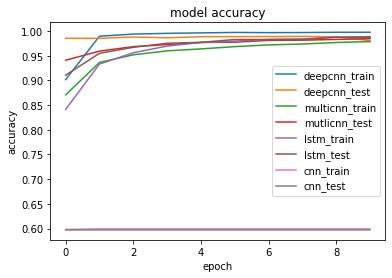

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history_deepcnn.history.keys())
print(history_multicnn.history.keys())
print(history_lstm.history.keys())
print(history_cnn.history.keys())




plt.plot(history_deepcnn.history['accuracy'])
plt.plot(history_deepcnn.history['val_accuracy'])


plt.plot(history_multicnn.history['accuracy'])
plt.plot(history_multicnn.history['val_accuracy'])


plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])

plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])



plt.legend(['deepcnn_train'  , 'deepcnn_test', 'multicnn_train', 'mutlicnn_test' , 'lstm_train', 'lstm_test', 'cnn_train', 'cnn_test'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()